 <img src="images/line.png" alt="ml" style="width : 100%;"/>

In [2]:
from sympy import *
from polyclass import *
from libaldo_math import *
from libaldo_show import *
from physic_lib import *
from IPython.display import display, Math
init_printing()
from IPython.display import Video

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM010.png" alt="ml" style="width : 100%;"/>

In [2]:
fx,x,alpha,m,g,F1,fr,mu,N1,V,L1=symbols('fx x alpha m g F1 fr mu N1 V L1')

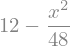

In [3]:
fx=12-x*x/48;fx

 <img src="images/WM010a.png" alt="ml" style="width : 100%;"/>

In [4]:
F=dataFunc(x,fx)

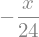

In [5]:
F.slope()

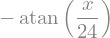

In [6]:
F.angTan()

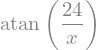

In [7]:
F.angOrto()

In [8]:
# create object
P=mparticle(m=10,g=10,x1=0,x2=24,y1=12,y2=0,v1=0,v2=V)

In [9]:
# refernece axis is tangent line over function
P.add_forza(100,-F.angTan(x)-pi/2) # angle change respect x pos
P.add_forza(N1,pi/2)
P.add_forza(fr,pi)

In [10]:
# reasing Nornal value in P
P.setValue(N1,csolve(P.y_res(),N1)) 

In [11]:
# reasing frozz value in P line Normal * mu
P.setValue(fr,N1/2) 

In [12]:
# Total Work is sum F(x)*dx ,unisymbols only asure sympy identifique unic variable
W=opemat(integrate(unisymbols(P.x_res(kope='s')),(x,0,12)),'v');W

In [13]:
# Total work = Energy Total and find V when P are in floor
csolve(P.energia()-W,V,korden=1)

In [14]:
P2=mparticle(m=10,g=10,x1=0,v1=13.45,v2=0,y1=0,y2=0)

In [15]:
P2.add_forza(50,pi) # Rozz force 

In [16]:
#Work in x axis
P2.work_due_forza('x')

In [17]:
#Energia total
P2.energia()

In [18]:
#find x2 if Wx=Etotal
L=csolve(P2.work_due_forza('x')-P2.energia(),x2,'L')

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM020.png" alt="ml" style="width : 60%;"/>

In [19]:
Fx,Fy,m,g,N1,fr,mu,alpha,L=symbols('Fx Fy m g N1 fr mu alpha L',positive=True)

In [20]:
# creating physical object P
P=mparticle()
# adding forces, angle , pos x, pos y  to every forces
P.add_forza(Fx,0,0,L*cos(alpha))
P.add_forza(m*g,-pi/2,L*sin(alpha)/2,L*cos(alpha)/2)
P.add_forza(fr,pi,L*sin(alpha),0)
P.add_forza(N1,pi/2,L*sin(alpha),0)
# Fy = cero...Ok

In [21]:
# get resultant forces in X equal cer0 then fr=Fx
P.x_res()

In [22]:
# # get resultant forces in Y equal cer0 then Normal= weight
P.y_res()

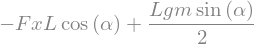

In [23]:
# get torque in B = point(L*sin(a),0) = cero  deduced by geometry  Ok nerd?
P.torque(L*sin(alpha),0)

In [24]:
# now we will change   fr and N1  value inside P whit info getting above
P.setValue(N1,m*g)
P.setValue(fr,N1*mu)

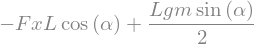

In [25]:
# get torque in B but with new data
P.torque(L*sin(alpha),0)

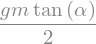

In [26]:
# also we know that torque equal cero and take this to find Fx whit csolve math func
csolve(P.torque(L*sin(alpha),0),Fx)

In [27]:
# seting Fx in P
P.setValue(Fx,csolve(P.torque(L*sin(alpha),0),Fx))

 <img src="images/WM020c.png" alt="ml" style="width : 100%;"/>

In [28]:
P.disp_solu()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

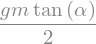

In [29]:
P.value(Fx)

In [30]:
# if Fx = fr then get alpha value 
ta=csolve(P.value(Fx)-P.value(fr),tan(alpha),'Tg_a')

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM020.png" alt="ml" style="width : 50%;"/>

In [31]:
Fx,Fy,m,g,N1,fr,mu,alpha,L,a_x,a_y,t,w_a=symbols('Fx Fy m g N1 fr mu alpha L a_x a_y t w_a',positive=True)

In [32]:
# Inercia
I_i=symbols('I_i')

In [33]:
# creating physical object P
P=mparticle()
# adding forces, angle , pos x, pos y  to every forces
P.add_forza(Fx,0,0,L*cos(alpha))
P.add_forza(m*g,-pi/2,L*sin(alpha)/2,L*cos(alpha)/2)
P.add_forza(fr,pi,L*sin(alpha),0)
P.add_forza(N1,pi/2,L*sin(alpha),0)
# Fy = cero...Ok

In [34]:
P.setValue(fr,N1*mu) # Now we will work whit m,g,Fx,N1 and mu for now

In [35]:
# Traslation X Equation , SumFx=mass*acc
Ex=polyclass(m*a_x,P.x_res());Ex.s()

In [36]:
# Traslation Y Equation , SumFx=mass*acc
Ey=polyclass(m*a_y,P.y_res());Ey.s()

In [37]:
# for geometry we know that mass center of P are in  (x1,y1) equal to.....
x1,y1=L*sin(alpha)/2,L*cos(alpha)/2

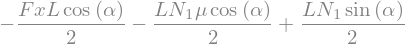

In [38]:
# get torque value in mass center for alpha value to use whit Inerce
P.torque(x1,y1)

 <img src="images/WM020d.png" alt="ml" style="width : 50%;"/>

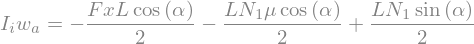

In [39]:
# InerciaMoment *AngulAcc=Torque then...
Ei=polyclass(I_i*w_a,P.torque(x1,y1));Ei.s()

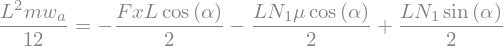

In [40]:
# but Ii=m*L*L/12 then redefine EqI
Ei=polyclass(m*L*L*w_a/12,P.torque(x1,y1));Ei.s()

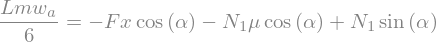

In [41]:
# 'M' = mult Ei by 2/L to reduce later aplied factor and simplidy... then...
Ei.psimplify('M',2/L,'fs')

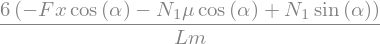

In [42]:
Ei.solve(w_a)

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM030.png" alt="ml" style="width : 80%;"/>

In [43]:
Fx,Fy,N1,fr,alpha,t,x,V=symbols('Fx Fy N1 fr alpha t x V',positive=True)

In [44]:
m=2
g=10
L=2
a1=pi/4
xx1,yy1,xx2,yy2=sin(pi/4),cos(pi/4),1,0
P=mparticle(m=2,g=10,x1=xx1,x2=xx2,y1=yy1,y2=yy2,v1=0,v2=V)

 <img src="images/WM030a.png" alt="ml" style="width : 80%;"/>

In [45]:
Fx=3*m*g*sin(alpha)*(3*cos(a1)-cos(alpha))
Fy=m*g-3*m*g*(1+2*cos(alpha)*cos(a1)-3*kpow(cos(alpha),2))/4

In [46]:
x1=5*sin(alpha) # x pos in alpha function..
y1=5*cos(alpha) # y pos in alpha function..

In [47]:
# WorxX= Fx*dx = Fx(a)*dx/d(alpha)
Wx=opemat(integrate(Fx*x1,(alpha,pi/4,pi/2)),'v');Wx # integrate give me num value

In [48]:
Wy=opemat(integrate(Fy*y1,(alpha,pi/4,pi/2)),'v');Wy

In [49]:
Wt=Wx+Wy;Wt

In [50]:
# Energy in tha system is equal to Total Work.. ??? humm let me if are good
V=csolve(P.energia()-Wx-Wy,V,'V_f',korden=1)

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM040.png" alt="ml" style="width : 100%;"/>

In [51]:
m,g,nx = symbols('m g nx',positive=True)

In [52]:
m=4
g=10
d=2
mu=1/4
N1=m*g
fr=N1*mu

In [53]:
# Work when pass one time
W=fr*d;W

In [54]:
# Work when pass nx time
Wn=W*nx;Wn

In [55]:
P=mparticle(m=4,g=10,y1=10,y2=0) # only y pos data is relevant 

In [56]:
# Total work will be equal to Potential Energy Total
P.energia('P')

In [57]:
nn=csolve(Wn-P.energia('P'),nx,'n_t')

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM050.png" alt="ml" style="width : 100%;"/>

In [34]:
m,g,Fx,fr,N1,b,mu,x,V=symbols('m g Fx fr N1 b mu x V',positive=True)

In [35]:
# Total work generate by fricction 
mu=frs(1,2)
N1=m*(b-x)*g
fr=N1*mu
W=integrate(fr,(x,b,0))
show_res(W,'W_t')

<IPython.core.display.Math object>

In [36]:
# a little trick to solve quicky
def Tenergy(m,g,h,v):
    Ek=m*v*v/2
    Ep=m*g*h
    kres=Ek+Ep
    show_res(kres,'E_t')
    return Ek+Ep

In [37]:
# Total Energy when is droped b long
E1=Tenergy(m*b,g,-b/2,0)

<IPython.core.display.Math object>

In [38]:
# Total Energy when is droped 2*b long
E2=Tenergy(m*b*2,g,-b,V)

<IPython.core.display.Math object>

In [39]:
show_res(E2-E1,'final_e')

<IPython.core.display.Math object>

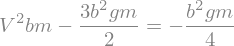

In [40]:
#$create Eq to solve , Et = Wt, find V
e1=polyclass(E2-E1,W);e1.s()

In [41]:
V=e1.solve(V,'V',korden=1)

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM060.png" alt="ml" style="width : 100%;"/>

In [2]:
m,g,F1,F2,x,V=symbols('m g F1 F2 x V',positive=True)

In [3]:
F1=15
F2=(2*x+5)
P=mparticle(m=2,g=10,x1=0,x2=x,y1=0,y2=0,v1=0,v2=V)

In [4]:
P.add_forza(F1,0)
P.add_forza(F2,pi)

In [5]:
W=kintegrate(P.x_res(),x);W

In [6]:
P.x_res()

In [7]:
V=csolve(P.energia()-W,V,'V',korden=0)

<IPython.core.display.Math object>

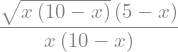

In [9]:
Vm=kdiff(V,x);Vm

In [11]:
X=csolve(Vm,x,'X_v')

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM070.png" alt="ml" style="width : 100%;"/>

In [3]:
m,g,r,alpha,V=symbols('m g r alpha V',positive=True)

In [4]:
# Part one.. On circle....
P=mparticle(m=m,g=g,x1=-r,y1=0,x2=r*sin(alpha),y2=-r*cos(alpha),v1=0,v2=V)

In [5]:
# Total Energy on circle equal cero, find out_V and store
V=csolve(P.energia(),V,'V',korden=1)

<IPython.core.display.Math object>

In [6]:
# Part two fly Ball fly..... kinematic seting
B=mparticle(v=V,x1=0,y1=0,a=alpha,y2=0,g=g) 

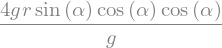

In [7]:
L=B.x_max();L

In [8]:
# Equation of d in alpha function
e1=polyclass(kdiff(L,alpha),0);e1.s()

In [9]:
e1.psimplify('D',4*r,'sf') # take e1, divide by 4*r and simpli.. and factor

In [10]:
e1.psimplify('D',cos(alpha),'sf') # del cos(al....) whit divide

In [18]:
kr=e1.solve(sin(alpha),'asin(alpha)' ,korden=1)

<IPython.core.display.Math object>

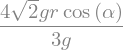

In [19]:
# ksubs is like subs in sympy but I dont know why sympy use double value and defini..
# see whit sympy
L.subs(alpha,asin(kr))
# ES UNA MIERDAAAAA...#  for this reazon I create and use... this...

 <img src="images/tip4.png" alt="ml" style="width : 100%;"/>

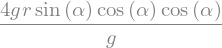

In [20]:
L #remember that L are in alpha funcction

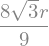

In [21]:
ksubs(L,alpha,asin(kr)) # change alpha by new  angle... and voaaallaaa

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

 <img src="images/WM090.png" alt="ml" style="width : 100%;"/>

In [39]:
V,V1,V2,alpha,L,m,g,h,d1,d2=symbols('V,V1 V2 alpha L m,g h d1 d2',positive=True)
g=10
h=4
m=1
V=rpow(144,2)
Pa=mparticle(m=m,g=g,x1=0,x2=d1,y1=0,y2=0,v1=V,v2=V1)
Pb=mparticle(m=m,g=g,x1=L,x2=d2,y1=0,y2=h,v1=V,v2=V2)

 <img src="images/energyDef.png" alt="ml" style="width : 100%;"/>

In [40]:
# E1 = Energy Total Initial
E1=Pa.energia('1')+Pb.energia('1') 

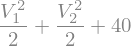

In [27]:
# E1 = Energy Total final
E2=Pa.energia('2')+Pb.energia('2') 

 <img src="images/WM090a.png" alt="ml" style="width : 100%;"/>

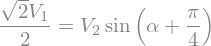

In [28]:
# create Equa Velocity same direcction are equal module 
e2=polyclass(V1*cos(pi/4),V2*cos(alpha-pi/4));e2.s()

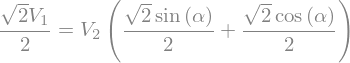

In [29]:
e2.psimplify('M',1,'x') # e2*1 and trig expand 

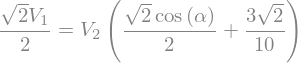

In [30]:
e2.setValue(sin(alpha),frs(3,5)) # e2 change alpha = 53grad 

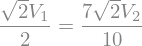

In [31]:
e2.setValue(cos(alpha),frs(4,5)) 

In [32]:
v22=e2.solve(V2,'V2')

<IPython.core.display.Math object>

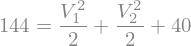

In [33]:
e3=polyclass(E1,E2);e3.s()

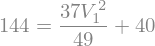

In [34]:
e3.setValue(V2,v22)

In [35]:
v11=e3.solve(V1,'V1',korden=1)

<IPython.core.display.Math object>

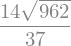

In [19]:
nsimplify(e3.solve(V1,korden=1))

 <img src="images/line.png" alt="ml" style="width : 100%;"/>